In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score

## Read Data

In [32]:
data_name = "dummy"
# data_name = "dummy_object"
df = pd.read_csv(f"../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,1,0,...,0,1,1,0,1,25,235,1,6.0,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,26,1142,0,0.0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,25,562,11,9.0,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,61,214,0,0.0,satisfied
4,0,0,0,0,1,0,0,0,0,1,...,1,0,1,0,1,52,2035,4,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61985,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,1,39,404,0,0.0,neutral or dissatisfied
61986,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,52,280,0,0.0,satisfied
61987,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,1,34,526,0,0.0,neutral or dissatisfied
61988,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,23,646,0,0.0,satisfied


## Train-Test Splitting

In [3]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0,1,0,0,0,0,1,0,...,1,0,1,1,0,1,25,235,1,6.0
1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,26,1142,0,0.0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,9.0
3,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,1,61,214,0,0.0
4,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,1,52,2035,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61985,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,39,404,0,0.0
61986,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,1,52,280,0,0.0
61987,0,0,0,1,0,0,0,0,0,1,...,1,0,1,1,0,1,34,526,0,0.0
61988,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,23,646,0,0.0


In [4]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
61985    neutral or dissatisfied
61986                  satisfied
61987    neutral or dissatisfied
61988                  satisfied
61989                  satisfied
Name: satisfaction, Length: 61990, dtype: object

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (43393, 94) and test set is :(18597, 94)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[ 4.90740858, -0.47061431, -0.53409881, ...,  0.76281939,
        -0.00783643, -0.09293955],
       [-0.20377354, -0.47061431, -0.53409881, ...,  1.80537414,
        -0.37460452, -0.37736359],
       [-0.20377354, -0.47061431,  1.87231274, ..., -0.32992592,
        -0.00783643,  0.24319794],
       ...,
       [-0.20377354, -0.47061431, -0.53409881, ...,  0.94244876,
        -0.37460452, -0.32565012],
       [-0.20377354, -0.47061431, -0.53409881, ...,  0.88697498,
        -0.37460452, -0.37736359],
       [-0.20377354,  2.12488225, -0.53409881, ..., -1.08014268,
        -0.37460452, -0.37736359]])

## Set paramiter CV

In [7]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model and fit to training data
model_lr = LogisticRegression()

start_time = time.time()  # เวลาเริ่มต้น
model_lr.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_LR = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.439063 วินาที


In [9]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_lr=model_lr.predict(X_test)
accuracy_LR=accuracy_score(y_pred_lr,y_test)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")

report=classification_report(y_test,y_pred_lr)
print("Classification Report is : \n",report)

Accuracy of Logistic Regression is : 93.89 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.90      0.90      0.90      5692
              satisfied       0.96      0.95      0.96     12905

               accuracy                           0.94     18597
              macro avg       0.93      0.93      0.93     18597
           weighted avg       0.94      0.94      0.94     18597



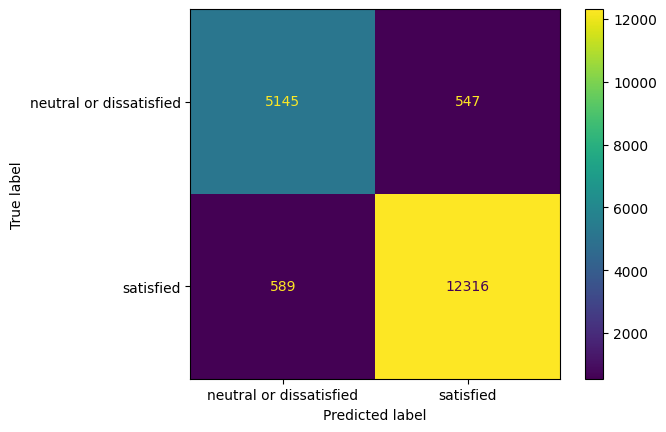

In [10]:
cm_1= confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
disp_1= ConfusionMatrixDisplay(confusion_matrix=cm_1,
                          display_labels=model_lr.classes_)
disp_1.plot()

In [11]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_LR = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_LR:.6f} วินาที")

Cross Validation Scores (Logistic Regression): [0.94676806 0.9363982  0.93259592 0.93881784 0.94745938 0.94158313
 0.93674386 0.93363291 0.94745938 0.94607674 0.94262012 0.93743519
 0.94089181 0.94329184 0.93775934]
Mean CV Accuracy: 0.9406
Standard Deviation CV Accuracy: 0.0048
เวลาที่ใช้ในการทำ Cross Validation: 7.018878 วินาที


In [12]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_lr.predict(X_train))
test_accuracy = accuracy_score(y_test, model_lr.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9415343488581107
Test Accuracy: 0.9389148787438835


## K-NN(K Nearest Neighbours)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.057050 วินาที


In [14]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 95.89 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.93      0.93      5692
              satisfied       0.97      0.97      0.97     12905

               accuracy                           0.96     18597
              macro avg       0.95      0.95      0.95     18597
           weighted avg       0.96      0.96      0.96     18597



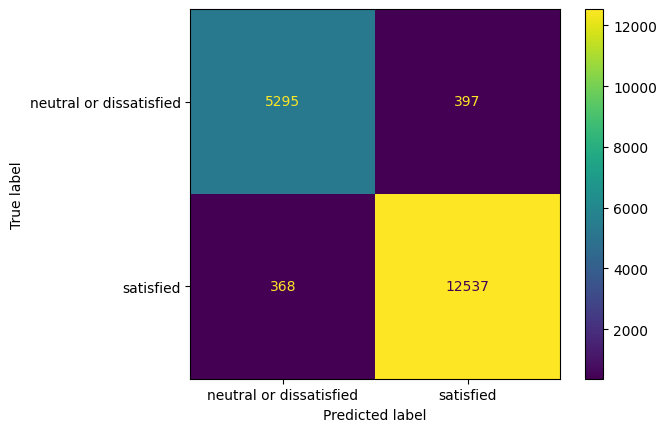

In [15]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_lr.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

In [16]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.96301417 0.96301417 0.95852057 0.96059454 0.96543381 0.9637055
 0.95782924 0.95990321 0.96439682 0.96508814 0.95713792 0.95990321
 0.9609402  0.96473029 0.96127248]
Mean CV Accuracy: 0.9617
Standard Deviation CV Accuracy: 0.0026
เวลาที่ใช้ในการทำ Cross Validation: 4.511356 วินาที


In [17]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.973544120019358
Test Accuracy: 0.9588643329569285


## Naive-Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# ใช้ MinMaxScaler แปลง X_train ให้อยู่ในช่วง 0 ถึง 1
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ฟิตโมเดลด้วยข้อมูลที่ถูกแปลงแล้ว
model_naive = MultinomialNB()

start_time = time.time()  # เวลาเริ่มต้น
model_naive.fit(X_train_scaled, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_NB = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.096288 วินาที


In [19]:

#Predict the accuracy of the model
y_pred_naive=model_naive.predict(X_test_scaled)

accuracy_NB=accuracy_score(y_pred_naive,y_test)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")

report=classification_report(y_test,y_pred_naive)
print("Classification Report is : \n",report)

Accuracy of Naive Bayes is : 87.04 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.77      0.82      0.80      5692
              satisfied       0.92      0.89      0.91     12905

               accuracy                           0.87     18597
              macro avg       0.84      0.86      0.85     18597
           weighted avg       0.87      0.87      0.87     18597



In [20]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_nb = cross_val_score(model_naive, X_train_scaled, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Naive Bayes): {cv_scores_nb}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_nb):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_nb):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_NB = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_NB:.6f} วินาที")

Cross Validation Scores (Naive Bayes): [0.87141376 0.86795714 0.86588317 0.86484618 0.87314207 0.87314207
 0.86864846 0.86795714 0.8828206  0.88040097 0.86899412 0.86311787
 0.8655375  0.87344398 0.87033195]
Mean CV Accuracy: 0.8705
Standard Deviation CV Accuracy: 0.0053
เวลาที่ใช้ในการทำ Cross Validation: 3.952723 วินาที


## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion='gini', splitter='best',max_features=6,random_state=1234)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_dt.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_DT = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")



เวลาที่ใช้ในการฝึกโมเดล: 0.094741 วินาที


In [22]:

#Predict the accuracy of the model
y_pred_dt=model_dt.predict(X_test)

accuracy_DT=accuracy_score(y_pred_dt,y_test)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")

report=classification_report(y_test,y_pred_dt)
print("Classification Report is : \n",report)

Accuracy of Decision Tree is : 93.25 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.89      0.89      0.89      5692
              satisfied       0.95      0.95      0.95     12905

               accuracy                           0.93     18597
              macro avg       0.92      0.92      0.92     18597
           weighted avg       0.93      0.93      0.93     18597



In [23]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_dt):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_DT = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_DT:.6f} วินาที")

Cross Validation Scores (Decision Tree): [0.93536122 0.92499136 0.92948496 0.93432423 0.94089181 0.93052195
 0.92533702 0.93466989 0.93536122 0.94227446 0.92118908 0.92671967
 0.93225026 0.94329184 0.92980636]
Mean CV Accuracy: 0.9324
Standard Deviation CV Accuracy: 0.0063
เวลาที่ใช้ในการทำ Cross Validation: 1.584749 วินาที


In [24]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, model_dt.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.9324622250900683


## สรูป

In [25]:
print("-"*30,"สรูป","-"*30)

print("-"*65)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")
# print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

print("-"*65)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")
# print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

print("-"*65)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")
# print(f"Cross Validation Scores (Naive Bayes): {cv_scores_nb}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_nb):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_nb):.4f}")

print("-"*65)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")
# print(f"Cross Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_dt):.4f}")


------------------------------ สรูป ------------------------------
-----------------------------------------------------------------
Accuracy of Logistic Regression is : 93.89 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.439063 วินาที
Mean CV Accuracy: 0.9406
Standard Deviation CV Accuracy: 0.0048
-----------------------------------------------------------------
Accuracy of Knn is : 95.89 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.057050 วินาที
Mean CV Accuracy: 0.9617
Standard Deviation CV Accuracy: 0.0026
-----------------------------------------------------------------
Accuracy of Naive Bayes is : 87.04 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.096288 วินาที
Mean CV Accuracy: 0.8705
Standard Deviation CV Accuracy: 0.0053
-----------------------------------------------------------------
Accuracy of Decision Tree is : 93.25 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.094741 วินาที
Mean CV Accuracy: 0.9324
Standard Deviation CV Accuracy: 0.0063


In [26]:
name = f"สรุป {data_name}".center(65)  # จัดให้ name อยู่ตรงกลางในความกว้าง 65 ตัวอักษร
line = "-" * 65
# Prepare data as a string
results = """
{}
{}
{}
Accuracy of Logistic Regression is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of KNN is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of Naive Bayes is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of Decision Tree is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
""".format(line, name, line,
    round(accuracy_LR*100, 2), training_time_LR, np.mean(cv_scores_lr), np.std(cv_scores_lr),
    round(accuracy_KNN*100, 2), training_time_KNN, np.mean(cv_scores_knn), np.std(cv_scores_knn),
    round(accuracy_NB*100, 2), training_time_NB, np.mean(cv_scores_nb), np.std(cv_scores_nb),
    round(accuracy_DT*100, 2), training_time_DT, np.mean(cv_scores_dt), np.std(cv_scores_dt)
)

# Write the data to a text file
with open(f'model_performance_{data_name}.txt', mode='w', encoding='utf-8') as file:
    file.write(results)

print("Results have been written to model_performance.txt")


Results have been written to model_performance.txt


 ## FULL Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler_full = StandardScaler()

X = scaler_full.fit_transform(X)
X

array([[-0.20444122, -0.47120236, -0.53510725, ..., -1.26769127,
        -0.35260622, -0.22361182],
       [-0.20444122, -0.47120236,  1.86878424, ..., -0.46983933,
        -0.37925209, -0.38160778],
       [-0.20444122, -0.47120236,  1.86878424, ..., -0.98004233,
        -0.08614753, -0.14461384],
       ...,
       [-0.20444122, -0.47120236, -0.53510725, ..., -1.01171011,
        -0.37925209, -0.38160778],
       [-0.20444122, -0.47120236, -0.53510725, ..., -0.90615086,
        -0.37925209, -0.38160778],
       [-0.20444122, -0.47120236, -0.53510725, ..., -0.48303424,
        -0.37925209, -0.38160778]])

In [28]:
model_knn_FULL=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn_FULL.fit(X,y)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.136679 วินาที


In [29]:
cv_scores_KNN_FULL = cross_val_score(model_knn_FULL, X, y, cv=k_folds, scoring='accuracy')

print(f"Cross Validation Scores (KNN): {cv_scores_KNN_FULL}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_KNN_FULL):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_KNN_FULL):.4f}")

Cross Validation Scores (KNN): [0.96056134 0.96104525 0.95935156 0.95959352 0.95983547 0.96370675
 0.96636826 0.9661263  0.96104525 0.96152916 0.96829622 0.96369797
 0.96345595 0.96369797 0.96176186]
Mean CV Accuracy: 0.9627
Standard Deviation CV Accuracy: 0.0026


## Export model and Pipeline

In [30]:
import pickle
pickle_out = open("../model/model_lr.pkl", mode = "wb")
pickle.dump(model_lr, pickle_out)
pickle_out.close()

In [31]:
with open('../model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)